In [ ]:
# scratchpad

In [1]:
# imports

import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoLars
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
import sklearn.preprocessing
import scipy.stats as stats

from env import host, user, password
import acquire
import wrangle_zillow

In [2]:
# getting zillow data from acquire file
df = acquire.get_zillow_data()

In [3]:
df.head() #check_yo_head

,parcelid,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
0,14297519,0.025595,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72
1,17052889,0.055619,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48
2,14186244,0.005383,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30
3,12177905,-0.103410,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51
4,12095076,-0.001011,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26


In [4]:
df.shape

(52442, 18)

In [5]:
df = wrangle_zillow.clean_zillow(df)

In [6]:
df.shape

(50913, 17)

In [7]:
df = wrangle_zillow.prepare_zillow(df)

In [8]:
df.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0,1,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0,0,1
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0,1,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,1,0,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26,1,0,0


In [9]:
df.shape

(50913, 20)

In [10]:
wrangle_zillow.summarize(df)



Dataframe head: 
|   parcelid |   logerror |   bathroomcnt |   bedroomcnt |   calculatedfinishedsquarefeet |   fips |   latitude |   longitude |   lotsizesquarefeet |   propertylandusetypeid |   regionidcity |   regionidcounty |   regionidzip |   yearbuilt |   structuretaxvaluedollarcnt |   taxvaluedollarcnt |   landtaxvaluedollarcnt |   taxamount |   LA |   Orange |   Ventura |
|-----------:|-----------:|--------------:|-------------:|-------------------------------:|-------:|-----------:|------------:|--------------------:|------------------------:|---------------:|-----------------:|--------------:|------------:|-----------------------------:|--------------------:|------------------------:|------------:|-----:|---------:|----------:|
|   14297519 | 0.0255949  |           3.5 |            4 |                           3100 |   6059 |    33.6349 |    -117.869 |                4506 |                     261 |          53571 |             1286 |         96978 |        1998 |          

NameError: name 'nulls_by_col' is not defined

In [ ]:
df = wrangle_zillow.create_features(df)

In [11]:
df.shape

(50913, 20)

In [12]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0,1,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0,0,1
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0,1,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,1,0,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26,1,0,0


In [13]:
df = wrangle_zillow.remove_outliers(df)

AttributeError: 'DataFrame' object has no attribute 'acres'

In [14]:
df.shape

(50913, 20)

In [15]:
df.head() #check_yo_head

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,
14297519,0.025595,3.5,4.0,3100.0,6059.0,33.634931,-117.869207,4506.0,261.0,53571.0,1286.0,96978.0,1998.0,485713.0,1023282.0,537569.0,11013.72,0,1,0
17052889,0.055619,1.0,2.0,1465.0,6111.0,34.449266,-119.281531,12647.0,261.0,13091.0,2061.0,97099.0,1967.0,88000.0,464000.0,376000.0,5672.48,0,0,1
14186244,0.005383,2.0,3.0,1243.0,6059.0,33.886168,-117.823170,8432.0,261.0,21412.0,1286.0,97078.0,1962.0,85289.0,564778.0,479489.0,6488.30,0,1,0
12177905,-0.103410,3.0,4.0,2376.0,6037.0,34.245180,-118.240722,13038.0,261.0,396551.0,3101.0,96330.0,1970.0,108918.0,145143.0,36225.0,1777.51,1,0,0
12095076,-0.001011,3.0,4.0,2962.0,6037.0,34.145202,-118.179824,63000.0,261.0,47019.0,3101.0,96293.0,1950.0,276684.0,773303.0,496619.0,9516.26,1,0,0


In [16]:
train, validate, test = wrangle_zillow.my_train_test_split(df)

train observations:  570220
validate observations:  244380
test observations:  203660


In [17]:
train.head()

,logerror,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertylandusetypeid,regionidcity,regionidcounty,regionidzip,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,LA,Orange,Ventura
parcelid,,,,,,,,,,,,,,,,,,,,
17131936,-0.007047,2.5,3.0,1567.0,6111.0,34.239794,-119.007533,3199.0,261.0,51239.0,2061.0,97091.0,1999.0,173607.0,496456.0,322849.0,5346.36,0,0,1
13922088,0.086207,2.0,3.0,1635.0,6059.0,33.829836,-117.897614,7917.0,261.0,16764.0,1286.0,97024.0,1963.0,94618.0,395024.0,300406.0,4766.66,0,1,0
14038053,0.325334,2.0,4.0,1351.0,6059.0,33.733539,-118.007939,7000.0,261.0,25218.0,1286.0,96965.0,1962.0,70138.0,647619.0,577481.0,7308.20,0,1,0
10724372,0.164710,4.0,5.0,3082.0,6037.0,34.206628,-118.647170,10505.0,261.0,12447.0,3101.0,96342.0,1994.0,356796.0,593747.0,236951.0,7461.66,1,0,0
14111745,-0.000542,2.5,3.0,1587.0,6059.0,33.820937,-118.061658,1850.0,261.0,44833.0,1286.0,96185.0,1967.0,100039.0,245760.0,145721.0,2968.58,0,1,0


In [18]:
train.shape

(28511, 20)

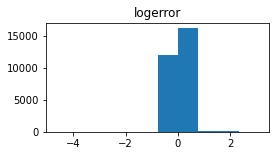

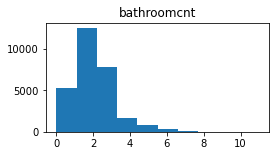

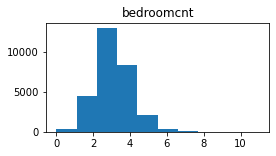

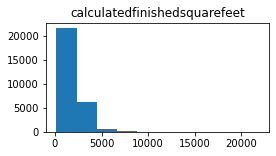

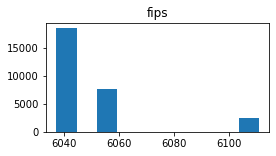

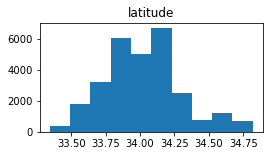

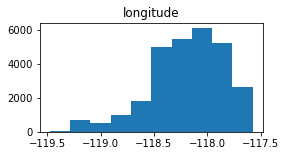

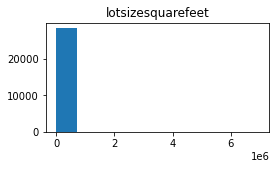

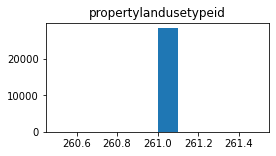

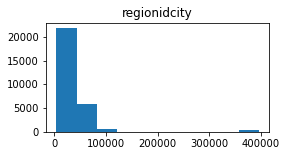

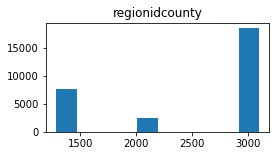

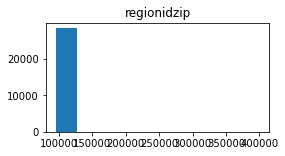

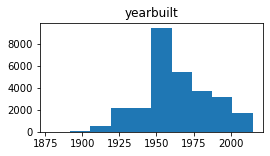

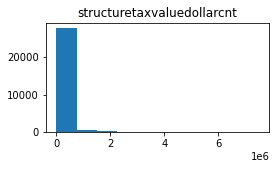

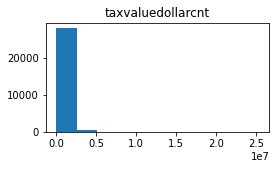

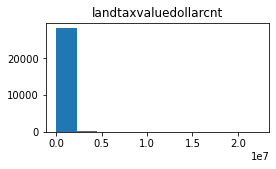

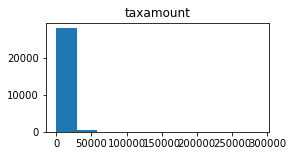

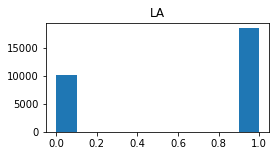

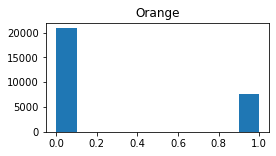

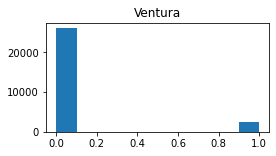

In [19]:
for col in train.columns:
    plt.figure(figsize=(4,2))
    plt.hist(train[col])
    plt.title(col)
    plt.show()

In [20]:
train.columns

Index(['logerror', 'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'fips', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertylandusetypeid', 'regionidcity', 'regionidcounty',
       'regionidzip', 'yearbuilt', 'structuretaxvaluedollarcnt',
       'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount', 'LA',
       'Orange', 'Ventura'],
      dtype='object')

In [ ]:
sns.boxplot(train.logerror, train.LA)
# plt.title("Is there a difference in spending score for\nmale vs. not male customers?")
plt.show()

In [ ]:
sns.scatterplot(x='logerror', y='bathroomcnt', 
                data=train, 
                color='blue'
               )

# plt.title("What is the relationship of annual income\nand spending score for those under 40?")
plt.show()

In [ ]:
sns.pairplot(train, hue='logerror')
plt.show()